In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.datasets import load_digits # Cargar los datos que vamos a usar
from sklearn.linear_model import LogisticRegression # Aplicar clasificación 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # detectar falsos positivos

# Carga de datos

In [8]:
digits = load_digits()

Text(0.5, 1.0, 'La etiqueta es:0')

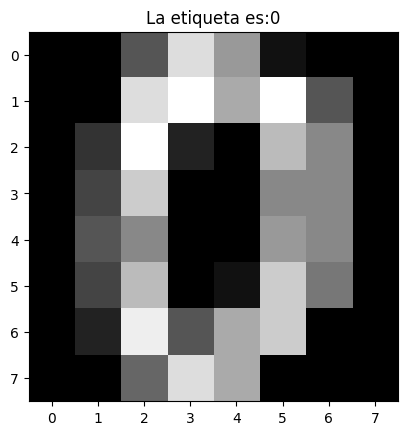

In [41]:
num = 0
image = np.reshape(digits.data[num],[8,8]) # 8X8 ya que la documentación de este dataset informa que así es que se deben tener los datos
plt.imshow(image, cmap="gray")
plt.title(f"La etiqueta es:{digits.target[num]}")

# Split de datos en train y test (ejemplo)

In [43]:
#train_test_split(los datos en entranamiento en X, clasificacion objetivo, valor a la variable test)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0 ) 

In [44]:
x_train.shape # 1437 ejemplos con 64 digitos

(1437, 64)

In [45]:
y_train.shape # 1437 ejemplos con 1 digitos (solo necistamos asber si es un 0, o un 5, y así)

(1437,)

## Entrenamiento modelo

In [66]:
logistic_reg = LogisticRegression(max_iter=10000)
 # entrenar nustro modelo con nuestro datos de entrenamiento
logistic_reg.fit(x_train, y_train) 

LogisticRegression(max_iter=10000)

## Evaluar el modelo

In [67]:
predictions = logistic_reg.predict(x_test)

In [68]:
cm = confusion_matrix(y_test,predictions)

In [70]:
cm
# para el caso cero (0) di 27 veces y no la clasifique en nunguna otra (columna)
# para el caso uno el le di 34 veces al caso uno y 1 vez al caso 6 y 2 al caso 8, pero la tendencia (mayor numeros) es en el caso 1
# así susecivamnte por la diagonal

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Text(0.5, 137.22222222222217, 'Predict Label')

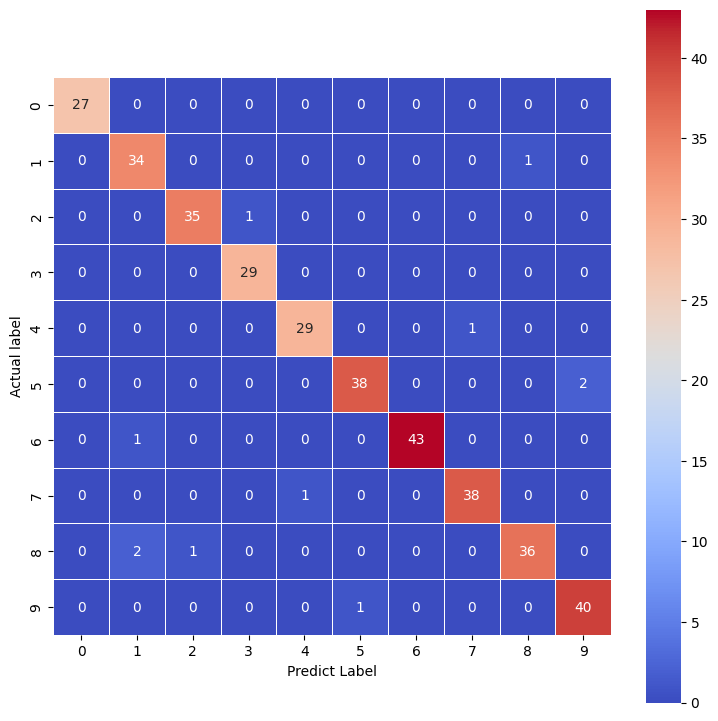

In [69]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap="coolwarm")
plt.ylabel("Actual label")
plt.xlabel("Predict Label")

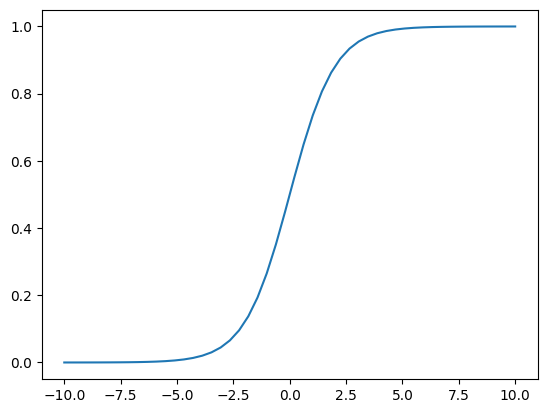

In [111]:
x = np.linspace(-10, 10, 50)

y = 1 /(1 + (np.exp(-x)))

plt.plot(x,y)


# Regresión logística binomial


## Carga de datos

In [3]:
df = pd.read_csv("../Data/Data_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Limpieza datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiando TotalCharges

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

### Manejo datos nulos

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Eliminar ID

In [10]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [11]:
df.drop("customerID", axis=1, inplace=True)

In [12]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Convertir a numerico la variable objetivo

In [13]:
df["Churn"].replace(to_replace="Yes", value = 1, inplace=True)
df["Churn"].replace(to_replace="No", value = 0, inplace=True)


/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_7898/153182518.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"].replace(to_replace="No", value = 0, inplace=True)


In [15]:
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [14]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [20]:
df_processing = df.copy()

### Manejar las variables categoricas

In [21]:
#drop_first=True
df_processing = pd.get_dummies(df_processing, dtype=int)
df_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación 

<Axes: >

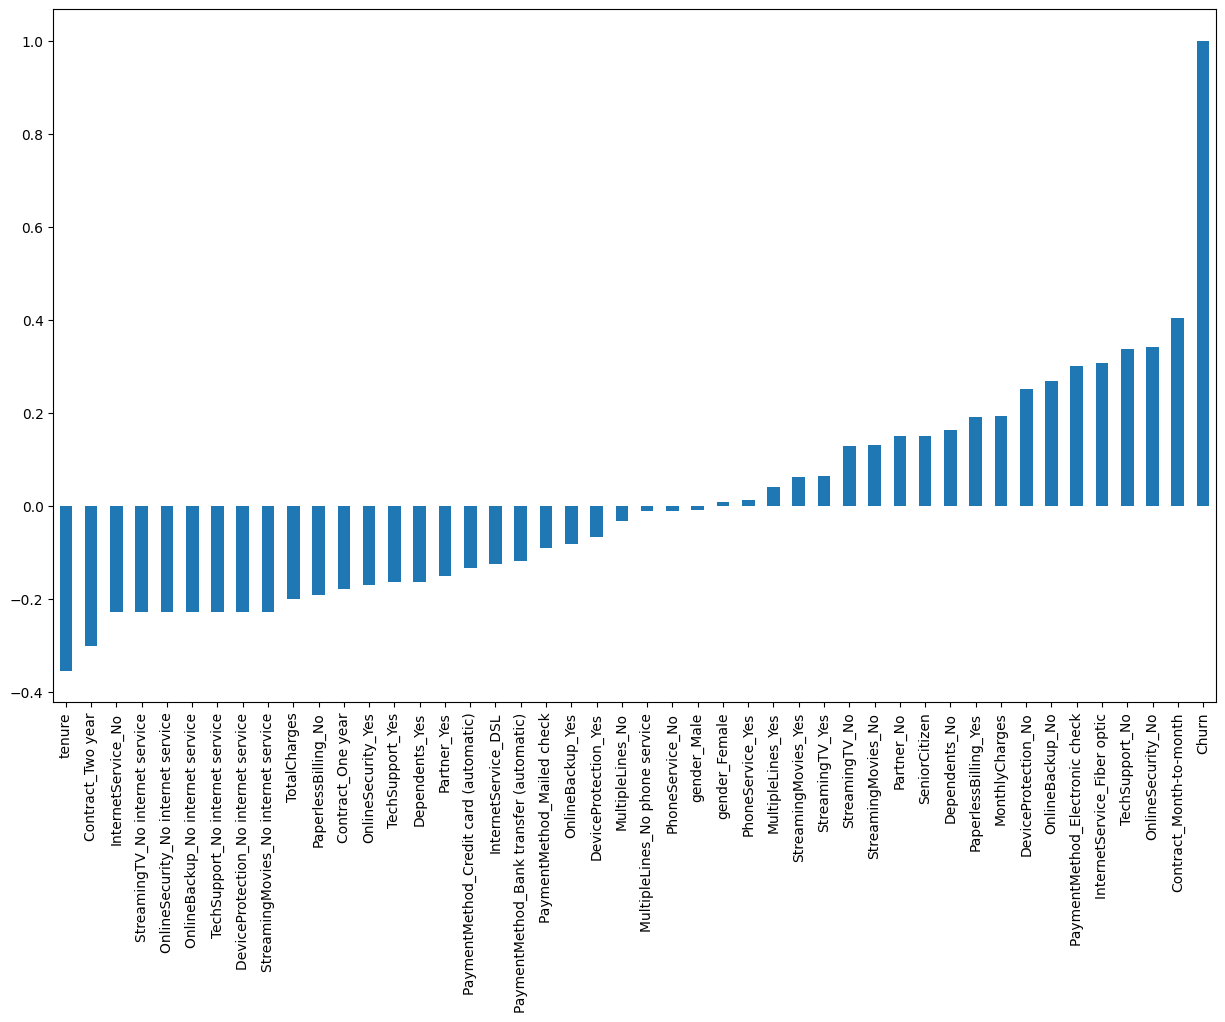

In [26]:
plt.figure(figsize=[15,9])
df_processing.corr()["Churn"].sort_values(ascending=True).plot(kind="bar")

## Escalabilidad de los dato

Llevar todos los datos a una misma escala para el algoritmo 

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
df_processing_scaled  = scaler.fit_transform(df_processing)

In [34]:
df_processing_scaled = pd.DataFrame(df_processing_scaled)

df_processing_scaled.columns = df_processing.columns

df_processing_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Análisis exploratorio de datosClase 

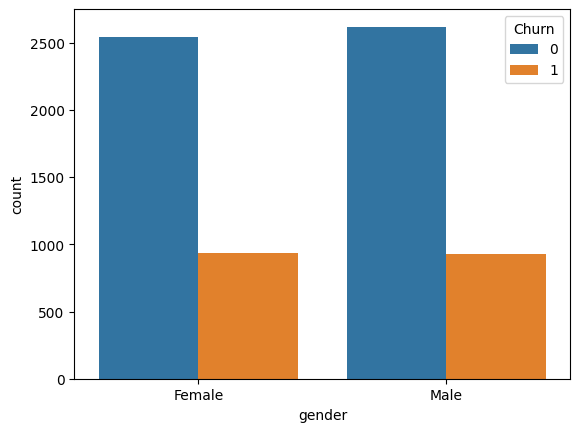

In [36]:
sns.countplot(data = df, x="gender", hue="Churn");

/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_7898/3821812417.py:15: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


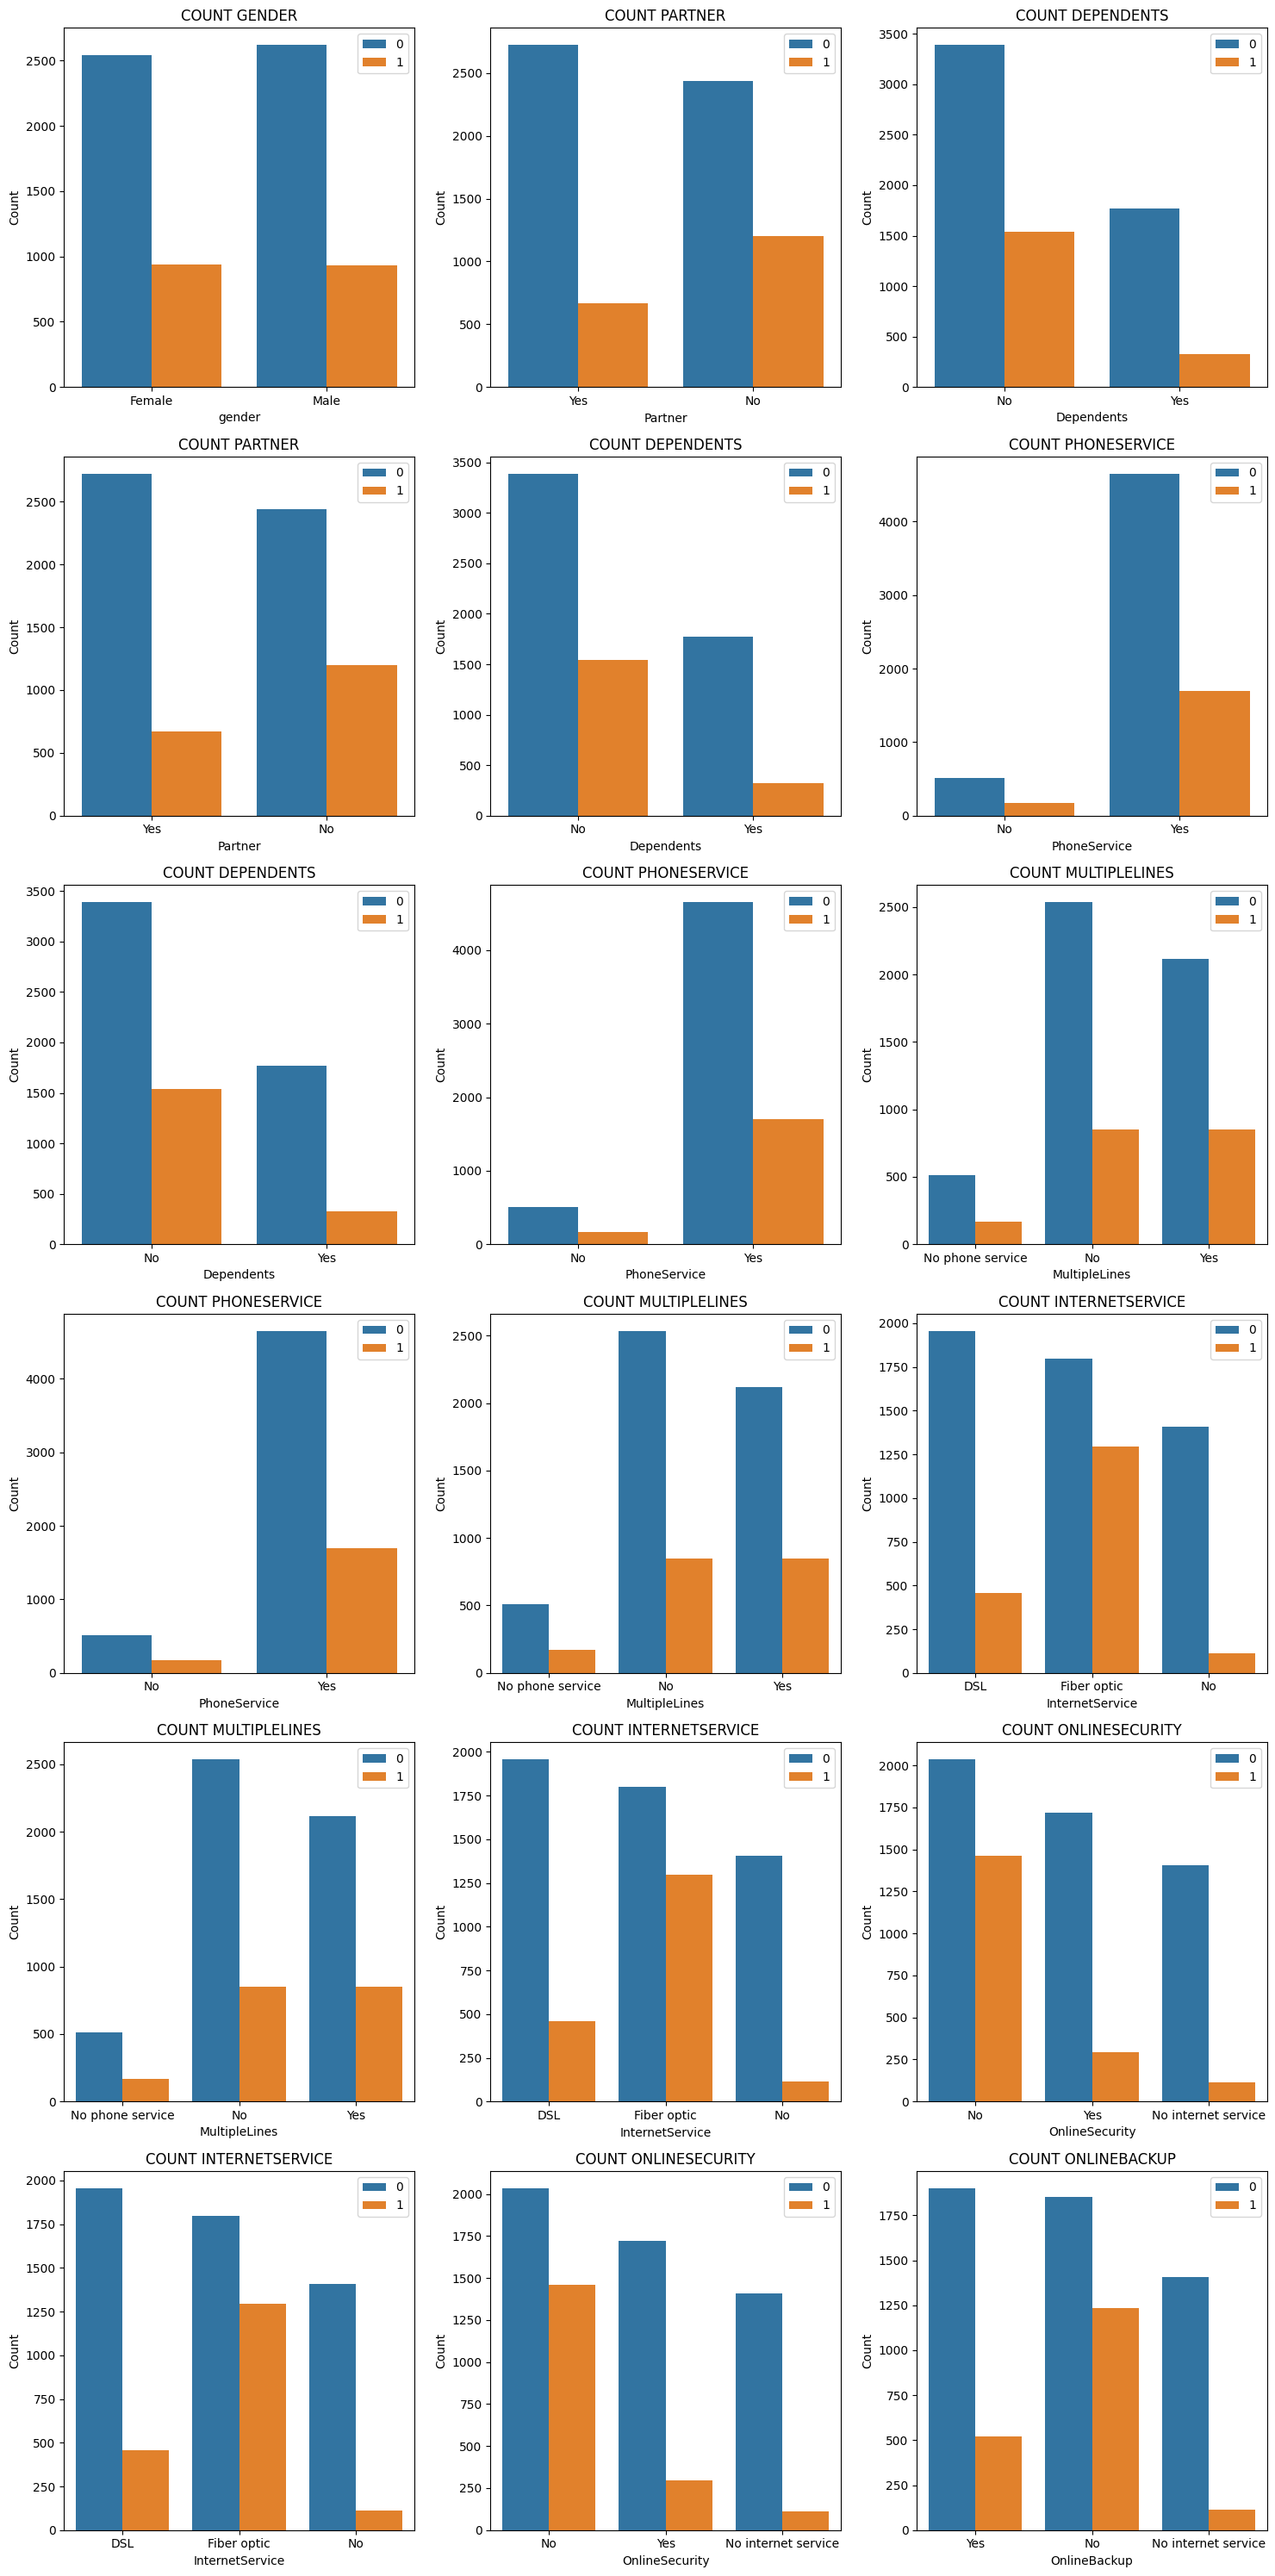

In [47]:
def plot_categorical(column):
    nplot = len(colums)
    nrows = ( nplot // ncols ) +1
    fig, axes = plt.subplots(nrows,ncols, figsize=(15,30), constrained_layout=True)
    for row in range(nrows):
        for col in range(ncols):
            title = colums[row+col]
            sns.countplot(data=df, x=title, hue='Churn', ax =axes[row,col])
            axes[row,col].set_title('COUNT ' + title.upper())
            axes[row,col].set_xlabel(title)
            axes[row,col].set_ylabel('Count')
            axes[row,col].legend()
    fig.tight_layout()
    plt.show()

columns_cat = df.select_dtypes(include="object").columns
plot_categoricals(columns_cat, 3)

<Figure size 1000x1000 with 0 Axes>

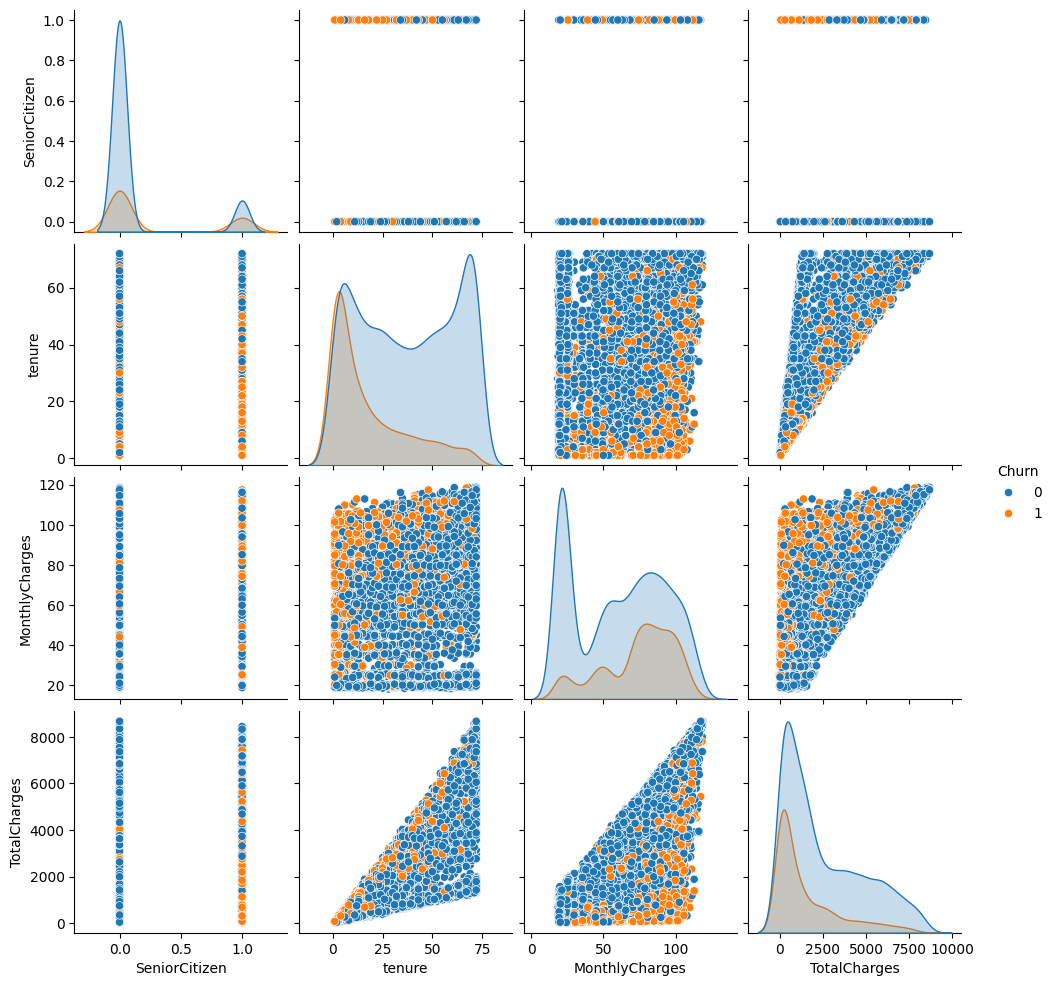

In [49]:
plt.figure(figsize=[10,10])
sns.pairplot(data=df, hue="Churn");

## Entrenamiento con regresión logística binomial

In [115]:
X = df_processing_scaled.drop("Churn",axis=1)
y = df_processing_scaled["Churn"].values


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state=42)

In [57]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)



(2110, 45)
(4922, 45)
(2110,)
(4922,)


In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)


LogisticRegression()

In [72]:
from sklearn import metrics

prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test),"% de presición ")

# Otro metodo para ontener el accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction_test)
print(cm.diagonal().sum()/cm.sum())


0.795260663507109 % de presición 
0.795260663507109


### Evaluación del modelo

In [73]:
model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]])

In [74]:
#Importancia de los feature
model.coef_

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [75]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


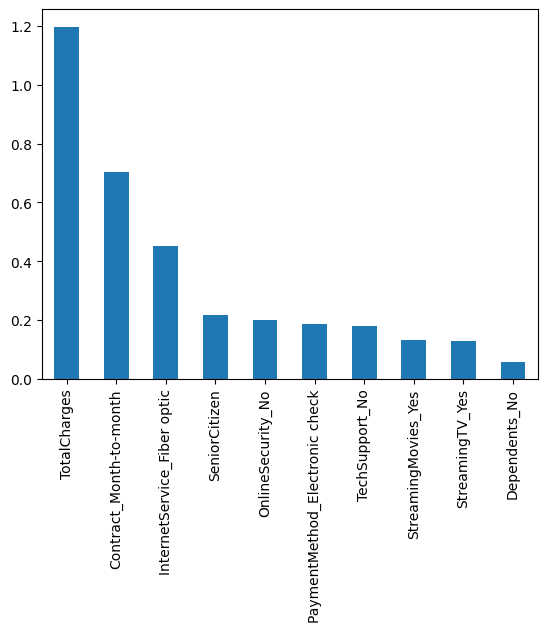

In [78]:
weights = pd.Series(model.coef_[0],
                   index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind="bar"))

In [138]:
weights.sort_values(ascending=False)[:10][weights.sort_values(ascending=False)[:10] < 0.19].index


Index(['PaymentMethod_Electronic check', 'TechSupport_No',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'Dependents_No'],
      dtype='object')

Axes(0.125,0.11;0.775x0.77)


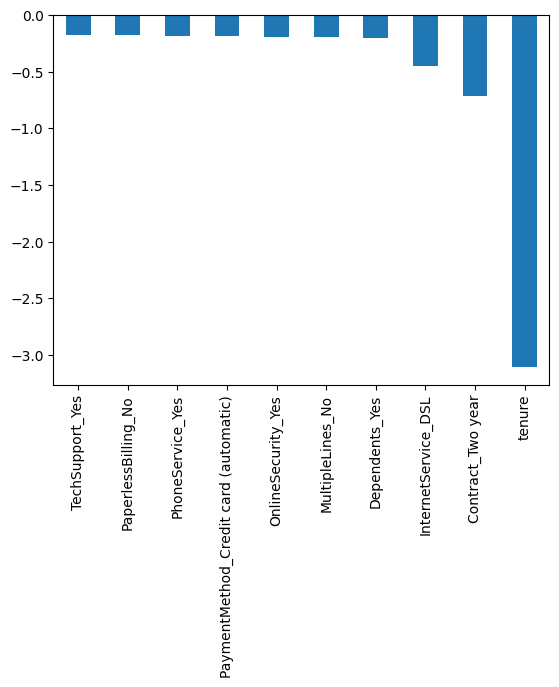

In [81]:
print(weights.sort_values(ascending=False)[-10:].plot(kind="bar"))


In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1000x2000 with 0 Axes>

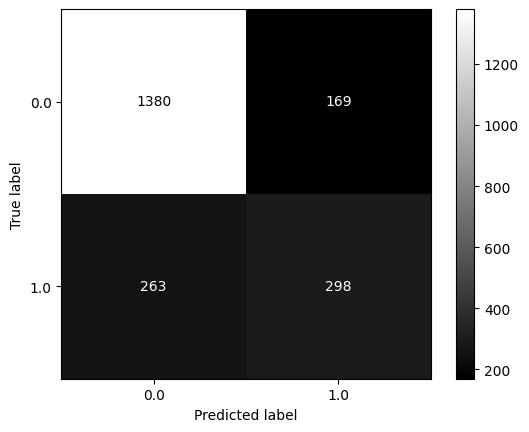

In [91]:
plt.figure(figsize=[10,20]);
cm = confusion_matrix(y_test, prediction_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap="gray");

## Mejorando el modelo

Cuando se analiza la distribución de datos se observa que los valores NO representan el 73% de todos los datos lo cual hace que el balance sea muy desproporcionado

In [95]:
df["Churn"].value_counts(normalize=True)*100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

Luego de entrenar el modelo se obtiene un accuracy de 0.81 y unos valores de precision y recall muy bajos para la clase 1, sobretodo el F1 que tiene 0.59 algo que evidencia claramente que el modelo no esta correctamente entrenado



In [102]:
from sklearn.metrics import classification_report

predicciones = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Para solucionarlo he usado la libería imbalanced-learn 



**BALANCEAMOS LOS DATOS**

In [113]:
from imblearn.combine import SMOTEENN

imp = SMOTEENN(sampling_strategy=0.99)
X_bal, y_bal = imp.fit_resample(X,y)

# Observamos como se encuentra la distribución de balanceo 



array([0., 1.])

Ahora las clases quedan practicamente igual,con estos nuevos X_bal & y_bal podemos entrenar el modelo (reemplazamos X_bal & y_bal en la función train_test_split y lo demás continua como se estaba haciendo. Al evaluar los resultados se observa claramente como han mejorado lo resutados pasando de un accuracy de 0.81 a 0.95 (asismo e mejora precision,recall y F1 en la clase 1).

In [118]:


X_train, X_test, y_train, y_test  = train_test_split(X_bal,y_bal, test_size=0.3, random_state=42)




model = LogisticRegression()
result = model.fit(X_train,y_train)



prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test),"% de presición ")

# Otro metodo para ontener el accuracy

cm = confusion_matrix(y_test,prediction_test)
print(cm.diagonal().sum()/cm.sum())

0.9122807017543859 % de presición 
0.9122807017543859


**Ahora eliminaremos las columnas que no ayudan a predecir ni el 1 ni el 0**

In [120]:
df_processing_scaled.drop(["Churn","PaymentMethod_Mailed check"],axis=1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7028,0.0,1.000000,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7029,0.0,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7030,1.0,0.042254,0.558706,0.033210,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [140]:
# Escogeremos las columnas necesarias 

X = df_processing_scaled.drop(["Churn",'TechSupport_Yes',
 'PaperlessBilling_No',
 'PhoneService_Yes',
 'PaymentMethod_Credit card (automatic)',
 'OnlineSecurity_Yes',
 'MultipleLines_No',
 'PaymentMethod_Electronic check', 'TechSupport_No',
 'StreamingMovies_Yes', 'StreamingTV_Yes', 'Dependents_No'],axis=1)
y = df_processing_scaled["Churn"].values

imp = SMOTEENN(sampling_strategy=0.99)
X_bal, y_bal = imp.fit_resample(X,y)


X_train, X_test, y_train, y_test  = train_test_split(X_bal,y_bal, test_size=0.3, random_state=42)




model = LogisticRegression()
result = model.fit(X_train,y_train)



prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test),"% de presición ")

# Otro metodo para ontener el accuracy

cm = confusion_matrix(y_test,prediction_test)
print(cm.diagonal().sum()/cm.sum())

0.9292479108635098 % de presición 
0.9292479108635098
